# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:
# insert code here
actual_counts = results['actual'].value_counts(normalize=True) * 100

In [3]:
print("Distribution of the Actual Event:")
print("True: {:.2f}%".format(actual_counts[1]))
print("False: {:.2f}%".format(actual_counts[0]))

Distribution of the Actual Event:
True: 60.00%
False: 40.00%


Imbalanced datasets can introduce bias in classification models and make it more challenging to predict the minority class. If the problem at hand requires accurate predictions for both True and False classes, then we might want to consider balancing the dataset or using different evaluation metrics that take into account the class imbalance.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

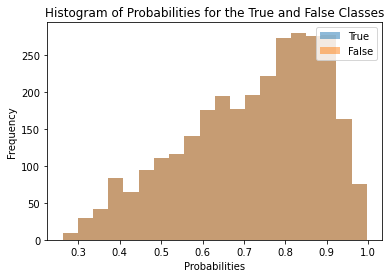

In [4]:
# insert code here
true_prob=results[results['actual'] == 1]['prob']
false_prob=results[results['actual'] == 1]['prob']
plt.hist(true_prob, bins=20, alpha=0.5, label='True')
plt.hist(false_prob, bins=20, alpha=0.5, label='False')
plt.title("Histogram of Probabilities for the True and False Classes")
plt.xlabel("Probabilities")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

From the above histogram I can observe only the probability of false classes. This could indicate that the classification model is not able to distinguish well between the two classes. It's also possible that the dataset itself is inherently difficult to classify and the lack of separation is due to the nature of the data. 

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [15]:
# insert code here
actual_labels = results['actual']
predicted_labels = (results['prob'] >= 0.5).astype(int)

# Calculate the confusion matrix
TP = np.sum((predicted_labels == 1) & (actual_labels == 1))
FP = np.sum((predicted_labels == 1) & (actual_labels == 0))
TN = np.sum((predicted_labels == 0) & (actual_labels == 0))
FN = np.sum((predicted_labels == 0) & (actual_labels == 1))

# Print the confusion matrix
print("Confusion Matrix:")
print("True Positives: ", TP)
print("False Positives: ", FP)
print("True Negatives: ", TN)
print("False Negatives: ", FN)

Confusion Matrix:
True Positives:  2623
False Positives:  210
True Negatives:  1790
False Negatives:  377


Based on the confusion matrix we can observe that the classification model predicted 1790 True negatives and 210 false positives, while it incorrectly predicted 377 False negatives and 2623 True positives. A high true positive percentage indicates that the model is effective at distinguishing between the positive and negative classes, which is important for minimizing the number of false negatives.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [16]:
# insert code here
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [17]:
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


If this was my model, I would use recall measure as the primary evaluation metrics. Recall measures the proportion of true positive predictions among all actual positive cases. 

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

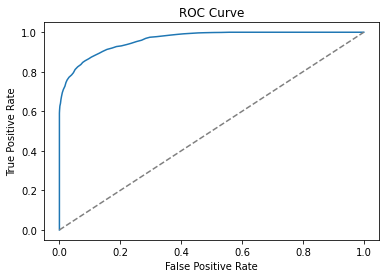

In [14]:
# Insert code here
# Separate the actual classes (0 or 1) from the predicted probabilities
true = results['actual']
prob = results['prob']

# Set the threshold values to use for classification
thresholds = np.linspace(0, 1, 101)

# Calculate the true positive rate (TPR) and false positive rate (FPR) for each threshold
TPR_list = []
FPR_list = []
for t in thresholds:
    # Convert the predicted probabilities to binary predictions using the threshold
    y_pred = np.where(prob >= t, 1, 0)
    # Calculate the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN)
    TP = np.sum((true == 1) & (y_pred == 1))
    FP = np.sum((true == 0) & (y_pred == 1))
    TN = np.sum((true == 0) & (y_pred == 0))
    FN = np.sum((true == 1) & (y_pred == 0))
    # Calculate the TPR and FPR for the current threshold
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    # Append the TPR and FPR to the lists
    TPR_list.append(TPR)
    FPR_list.append(FPR)

# Plot the ROC curve
plt.plot(FPR_list, TPR_list)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


The ROC curve is away from the diagonal line and on the true positive side, it suggests that the model is performing better than random guessing. The further the ROC curve is from the diagonal line, the better the performance of the model.